## Visualizing crime statistics in LA

### Goal: 
To understand the crime landscape in LA by answering the following questions.
##### 1. What are most recurring crimes in LA?
##### 2. Is the police response a match for the criminal activity?
##### 3. Does the LA police deparment seems to follow a strategy based on data to mitigate crime?

In [135]:
#We start by importing our dependencies
import pandas as pd
from help_functions import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [136]:
# Loading csv files into dataframes
# To know more about where this data comer from, check the documentation in the file prepare_data.py
path = 'los-angeles-crime-arrest-data/'
cri = pd.read_csv(path + 'crime-data.csv', encoding='utf-8')
arr = pd.read_csv(path + 'arrest-data.csv', encoding='utf-8')

In [137]:
# Preparing date variables to be able to compare accross databases
cri = prepare_data(cri)
arr = prepare_data(arr)

/Users/AbreuLastra_Work/repos/crime_analysis/help_functions.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['week'] = df['date'].dt.strftime('%Y-w%U')
/Users/AbreuLastra_Work/repos/crime_analysis/help_functions.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['month'] = df['date'].dt.month
/Users/AbreuLastra_Work/repos/crime_analysis/help_functions.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### 1. What are most recurring crimes in LA?
Let's start with question 1. We begin with a brief description of the crime database.

In [138]:
print('This analysis takes data from the LA Police department crimes reports from {}, until {}.'.format(cri.date.min(), cri.date.max()))
print('The final table contains {} cases.'.format(cri.shape[0]))
print('The LA police identifies in its database {} types of crimes.'.format(cri['Crime Code'].value_counts().shape[0]))

This analysis takes data from the LA Police department crimes reports from 2018-12-25 00:00:00, until 2019-06-22 00:00:00.
The final table contains 103181 cases.
The LA police identifies in its database 130 types of crimes.


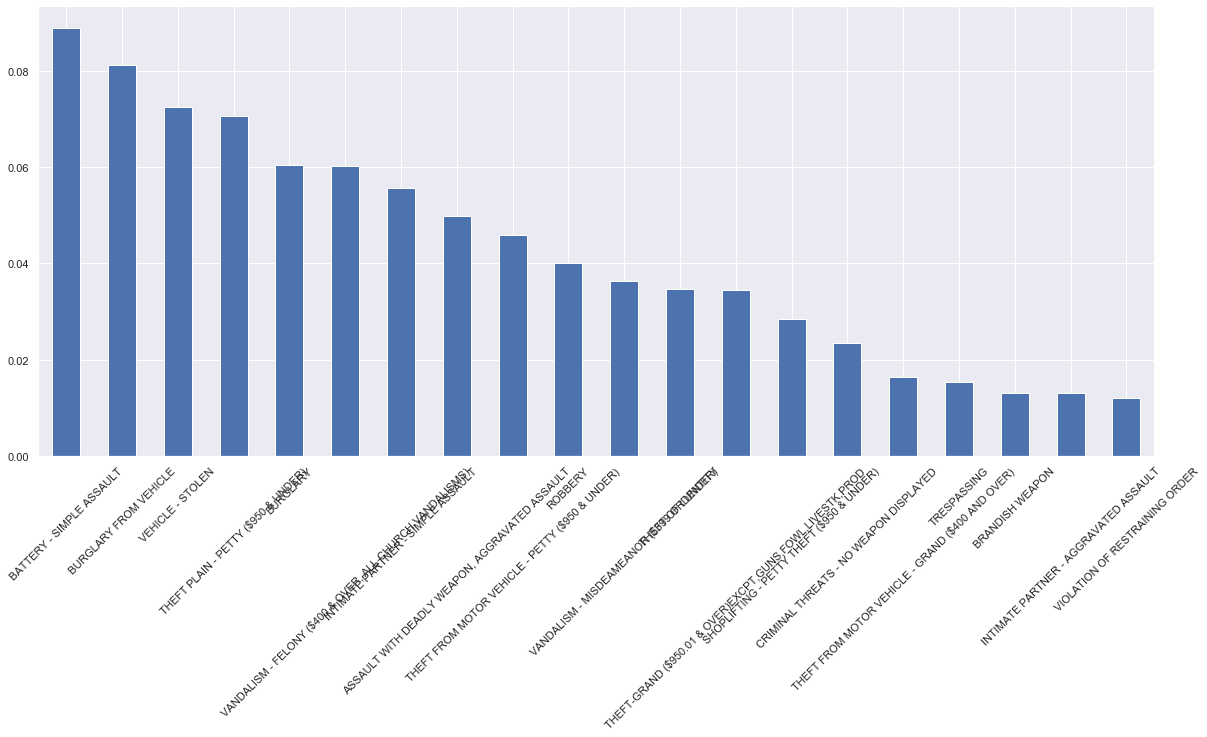

In [8]:
most_frequent_crimes = cri['Crime Code Description'].value_counts().head(20) / cri['Crime Code'].value_counts().sum()
chart = most_frequent_crimes.plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

Since there are more than a hundred kind of crimes reported in the database, let's focus on the more prevalent. The graph below shows the frequency of the top 20 crimes. The most frequent is simple assault. Then we see burglary from vehicle, and stolen vehicle. None of these types of crimes account for more than 10% of the total activity. If we look closely, though, there are many types of crimes that seem related to each other (like simple and aggravated assaults, different types of theft). This makes it hard to see a clear picture about what are the main criminal activities happening in the City.Since there are more than a hundred kind of crimes reported in the database, let's focus on the more prevalent. The graph below shows the frequency of the top 20 crimes. The most frequent is simple assault. Then we see burglary from vehicle, and stolen vehicle. None of these types of crimes account for more than 10% of the total activity. If we look closely, though, there are many types of crimes that seem related to each other (like simple and aggravated assaults, different types of theft). This makes it hard to see a clear picture about what are the main criminal activities happening in the City.

Following an analysis of how the policie typifies crimes, I relabeled the crime description code, based on the variable 'Charge Group Description', from the arrests database. We could benefit in two ways from this: first, we would have broader categories for types of crimes, allowing us to identify the main problems in the city; second, we could have consistency across the crime and arrests database. 

The next graph is the same graph as above, but after relabeling the most recurrent crimes. 

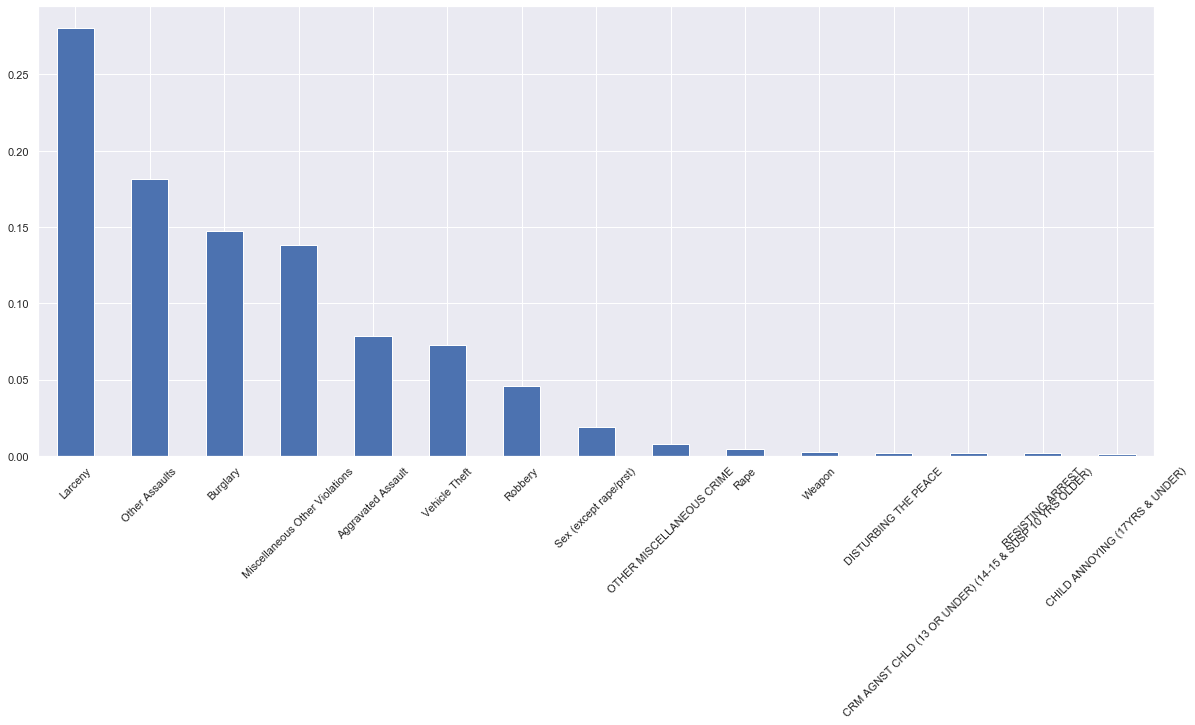

In [12]:
most_frequent_crimes = cri['crime_description_recoded'].value_counts().head(15) / cri['crime_description_recoded'].value_counts().sum()
chart = most_frequent_crimes.plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

As we can see, when we regroup the crime descriptions, it becomes evident that there are eight types of crimes that account for more than 96% of all the criminal activity. In particular, larceny alone accounts for about a third of all crime. It's noteworthy that most of the thefts are non violent. Larceny implies the theft of property, but not directly from its owner; and burglary implies that somebody entered a building to take something, but again, they are not like robbery, which implies that somebody was taking from someone using force. [references: see here](https://www.criminaldefenselawyer.com/resources/criminal-defense/criminal-offense/differences-between-theft-burglary-robbery)

In [21]:
# We will record the top 8 crimes, to use later
top_crimes = cri['crime_description_recoded'].value_counts().head(8).index

In [22]:
most_frequent_crimes.head(8).sum()

0.9633556565646776

Let's take a look from another angle: the weekly pattern of criminal activity. 

Criminal activity, on average, seems to be almost evenly distributed throughout the week.  The day of the week is Sunday, and then it grows gradually, to hit a peak on fridays. Then saturday goes down again. 

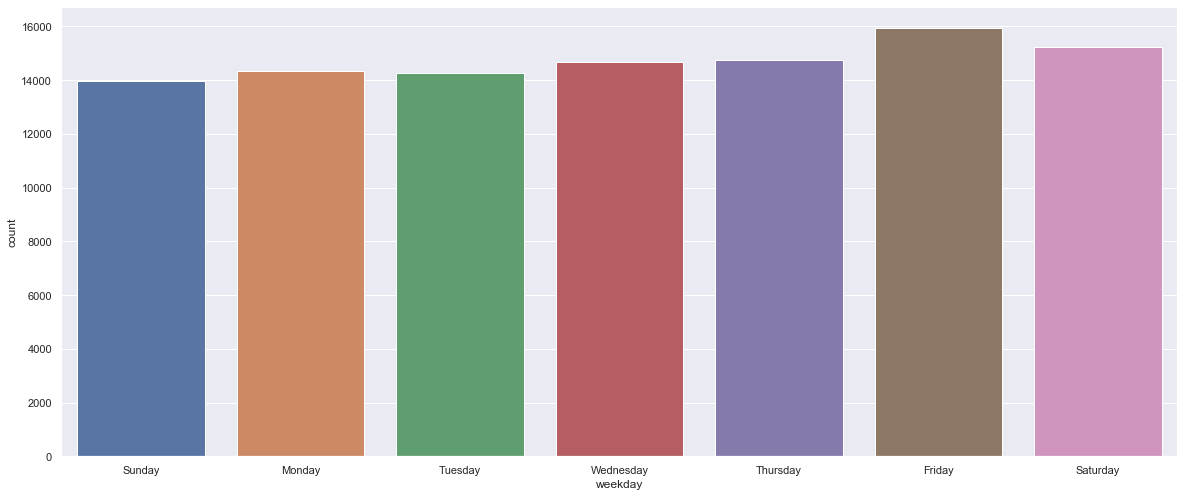

In [15]:
ax = sns.countplot(x="weekday", data=cri, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

In [23]:
top_crimes

Index(['Larceny', 'Other Assaults', 'Burglary',
       'Miscellaneous Other Violations', 'Aggravated Assault', 'Vehicle Theft',
       'Robbery', 'Sex (except rape/prst)'],
      dtype='object')

When we limit the analysis by day of the week to the top six crimes, as defined above, there are some interesting findings. Friday is the top day for four of the most prevalent crimes: larceny, burglary, robbery and vehicle theft. Without doing too much research, one could speculate that this is the day of the week that most people go out for dinner or entertainment, living their homes unattended, and are probably less careful about their belongings or behavior. For aggravated and other types of assault, perhaps the most worrysome crime in this bundle because it implies violence, the peak occurs on weekends both saturday and sunday. Finally, the sex related crimes are more likely to happen during the working week, rather than on weekends. 

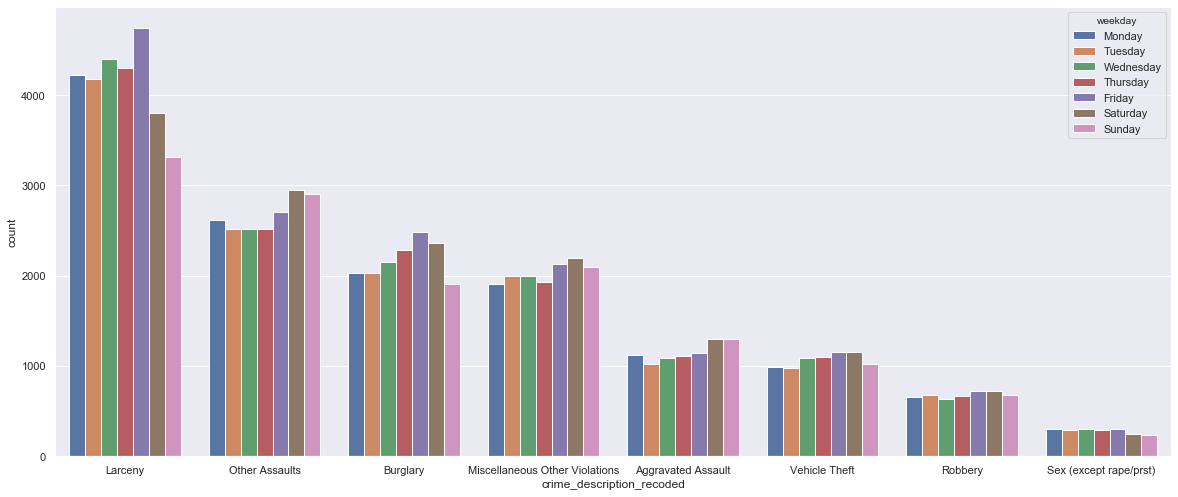

In [190]:
ax = sns.countplot(x="crime_description_recoded", order = top_crimes.tolist(), data=cri[cri['crime_description_recoded'].isin(top_crimes)], hue = 'weekday', hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


In [141]:
ax.figure.savefig('crime_per_day.png')

To answer question 1 (**What are most recurring crimes in LA?**): The most reccurent crime in LA is burglary, with more than 28k cases every six months. Along with assaults, and burglaries, they account for moe than 60% of the criminal activity. As we can see, these crimes share in common that they show an even distritution during the weekd days, and an increase toward the weekend. Activities related to stealing property, like burglary and larceny, reach a peak on fridays; assaults, aggravated and other types, occur more often on Saturdays and Sundays. 

In [142]:
most_frequent_crimes.head(3).sum()

0.6096762000755953

In [143]:
cri['crime_description_recoded'].value_counts().head(15) 

Larceny                                                     28952
Other Assaults                                              18718
Burglary                                                    15237
Miscellaneous Other Violations                              14239
Aggravated Assault                                           8076
Vehicle Theft                                                7487
Robbery                                                      4727
Sex (except rape/prst)                                       1964
OTHER MISCELLANEOUS CRIME                                     816
Rape                                                          437
Weapon                                                        234
DISTURBING THE PEACE                                          189
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)      183
RESISTING ARREST                                              165
CHILD ANNOYING (17YRS & UNDER)                                139
Name: crim

### 2. Is the police response a match for the criminal activity?


To answer question 2, first we describe the shape of the arrests database.

In [144]:
arr_cri_ratio = arr.shape[0]/cri.shape[0]
print('This analysis takes data from the LA Police department arrests reports from {}, until {}.'.format(arr.date.min(), arr.date.max()))
print('The final table contains {} cases. Namely, the ratio of arrests to crimes reported is {}.'.format(arr.shape[0], arr_cri_ratio))
print('The LA police identifies in its database {} types of charge groups, and {} types of charges.'.format(arr['Charge Group Description'].value_counts().shape[0], arr['Charge Description'].value_counts().shape[0]))


This analysis takes data from the LA Police department arrests reports from 2018-12-25 00:00:00, until 2019-06-22 00:00:00.
The final table contains 40884 cases. Namely, the ratio of arrests to crimes reported is 0.39623574107636095.
The LA police identifies in its database 27 types of charge groups, and 835 types of charges.


So, about for every two reported crimes, there isapproximately one arrest. Initially, it can be assumed that multiple reports could be linked to one case, so this number might not be necessary labeled as 'low'. Let's turn to see if what are the most types of arrest.

In [145]:
top_arrests = arr['Charge Group Description'].value_counts().head(6).index

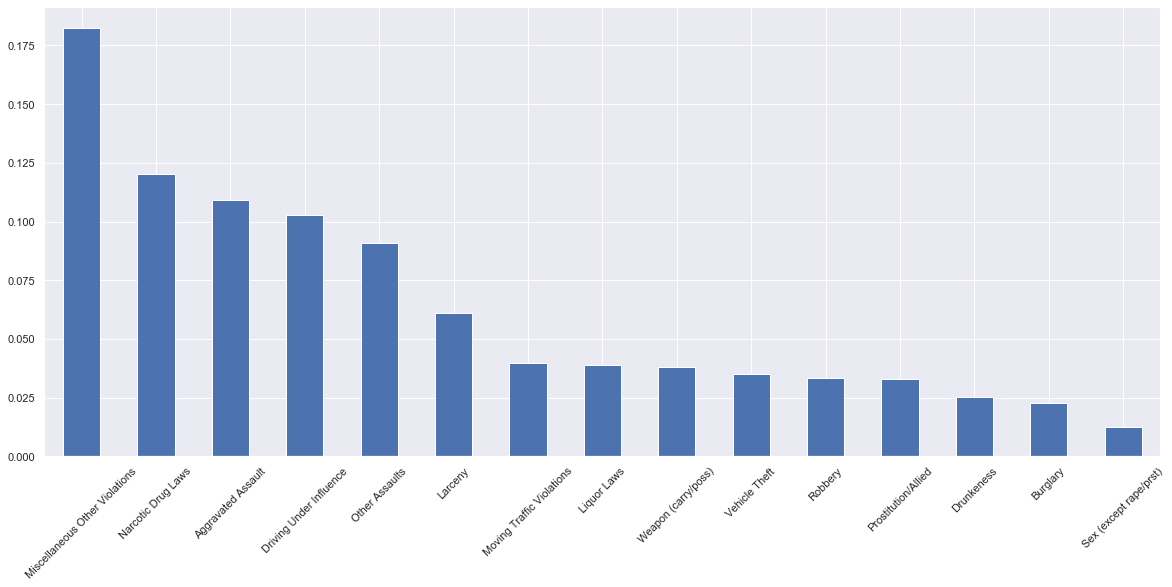

In [146]:
most_frequent_arrests = arr['Charge Group Description'].value_counts().head(15) / arr['Charge Group Description'].value_counts().sum()
chart = most_frequent_arrests.plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

The most frequent type of arrest goes to the group "Miscellaneous Other Violations", with 17% of the cases. This category includes parole violations, failure to pay, and vandalism. Next are "Narcotic Drug Laws", "Aggravated Assault", "Driving Under Influence" and "Other assaults. From the top five charge group descriptions, two overlap with most frequent type of crimes: both types of assaults. Larceny, which is the top crime, represents less than 7% of arrests.

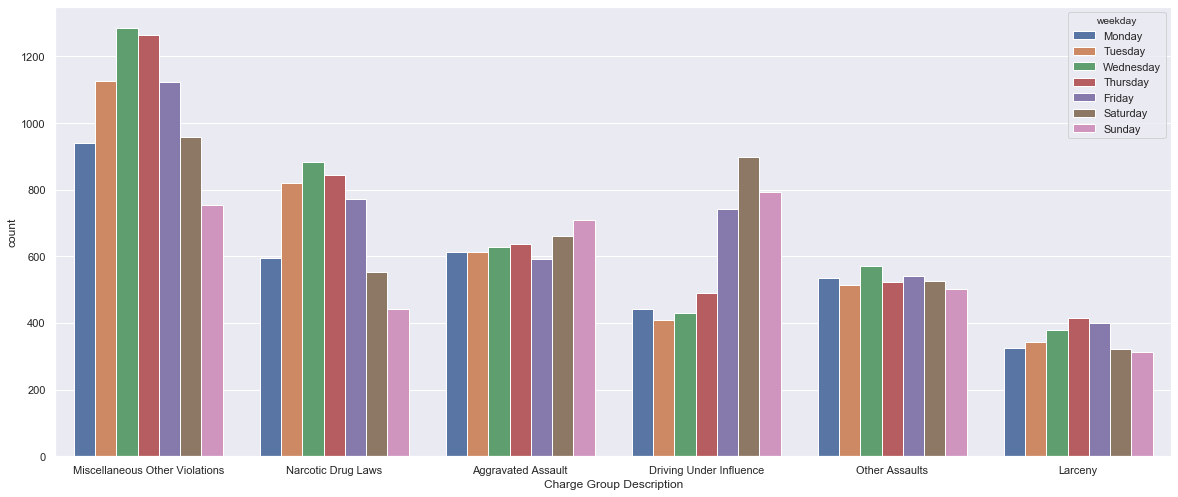

In [148]:
ax = sns.countplot(x='Charge Group Description', order = top_arrests.tolist(), data=arr[arr['Charge Group Description'].isin(top_arrests)], hue = 'weekday', hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])



If we analyze the arrest activity during the week, we get a different picture than the crime reports. Most of the arrest happen in the miscelanous other violations, and narcotic drug laws categories. Actually, it is noteworthy that they happen mostly during working weekdays, peaking on wednesdays. 

There is one category that does not appear in the top crimes reported, that account for a significant chunk of arrests: driving under influence. Going a bit deeper, we can see that this type of arrests spike on weekends, consistent with the days of the weeks most likely to have higher alcohol consumption. 

The first type of arrest that is consistent with the crime reports is related to aggravated assault, even in the fact that the busiest days are saturdays and sundays. For the category "other assaulsts", it is reassuring to see it in the top, however, at least from a graphic point of view, it does not mirror the pattern observed in the crime reports, busier on weekends. 

At first glance, we can see that the police focuses on actitities that seem to be led by the judiciary system (e.g. warrants of arrest), and a certain degree of flagrancy (attacks). While larceny appears high in the types of arrest, it comes only in sixth place. On friday, the day of the week with the highest crime rate, when larceny hits its peak, is also one of the days when the least number of arrests for this type of crime are made. 

In [150]:
ax.figure.savefig('arrests_per_day.png')

In [151]:
# Here we create the value counts of the 8 most prevalent crimes
arrests = arr[arr['Charge Group Description'].isin(top_crimes)]['Charge Group Description'].value_counts().sort_index()

In [44]:
# and here we create the value counts of the 8 most prevalent types of arrests.
crimes = cri[cri['crime_description_recoded'].isin(top_crimes)]['crime_description_recoded'].value_counts().sort_index()

In [50]:
crimes


Aggravated Assault                 8076
Burglary                          15237
Larceny                           28952
Miscellaneous Other Violations    14239
Other Assaults                    18718
Robbery                            4727
Sex (except rape/prst)             1964
Vehicle Theft                      7487
Name: crime_description_recoded, dtype: int64

In [51]:
# and then we calculate the ratio of arrests to number of crimes reported, by type
ratio = arrests/crimes

Aggravatede assault and other miscelaneous violations have the largest ratio of arrest to crime reports, both higher than 0.5 (or 1 for each 2). The crimes with the highest ratio, are also associated with violence or flagrancy. Larceny, the most frequent crimes, has one of the lowest ratios, with less than 1 arrest for every 10 reports. This is consistent with analysis by day of week. 

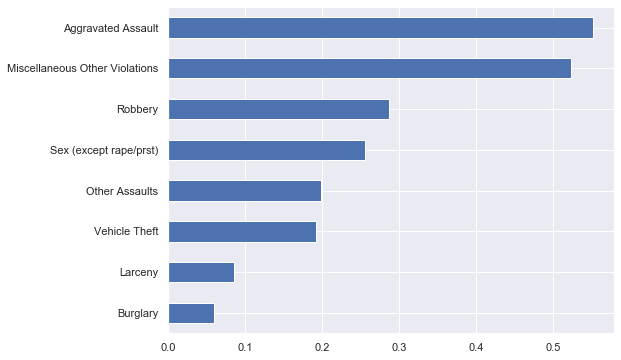

In [158]:
ratio.sort_values().plot(kind='barh', figsize=(8, 6)).figure.savefig('ratio_arrest_crime');

**To answer question 2**, the police seems to consistently address crimes that appear to be urgent or violent. However, for two the top three most frequent types of crimes, the ratio is lower than 1 arrest for every 10 reports. The police seems to be more of a match for urgent type of crimes, than for crimes related to theft.

#### 3. Does the LA police deparment seems to follow a strategy based on data to mitigate crime?

At this point, we introduce a new dimension: area where crimes are reported. Accross neighborhoods, larceny remains the most reported crime, except in 77th street, where larceny comes in second place. The second most frequently reported crimes are either other assaults and burglaries. 

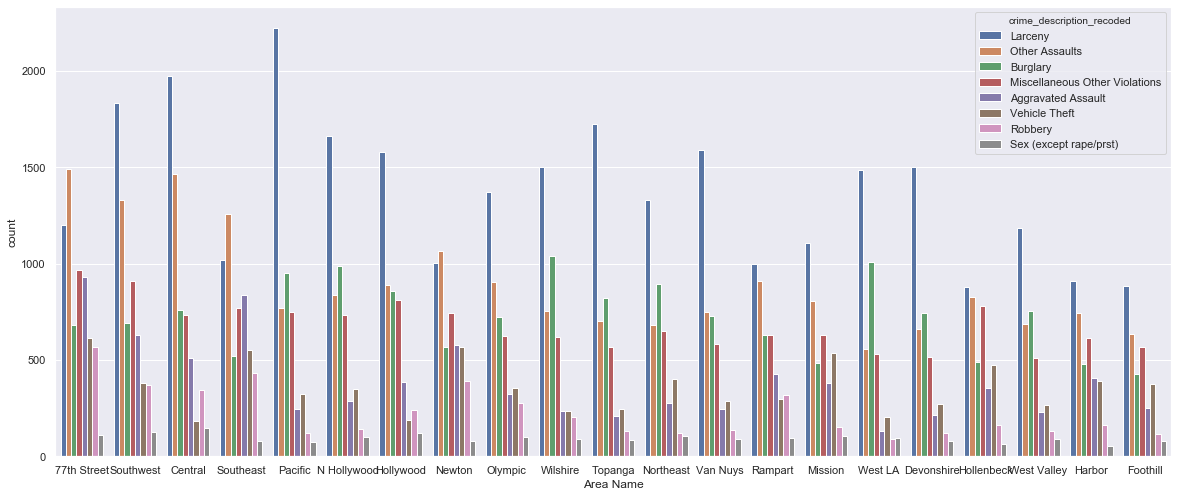

In [159]:
data=cri[cri['crime_description_recoded'].isin(top_crimes)]
crime_order = data['crime_description_recoded'].value_counts().index.tolist()
neigh_order =  data['Area Name'].value_counts().index
sns.countplot(x='Area Name', order = neigh_order, data= data, hue = 'crime_description_recoded', hue_order = crime_order);


When we contrast the previous results, with the police activity (i.e. arrests), it could be argued that there is a disconnection. The main focus for arrests are micellaneous other violations in almost all of the neighborhoods, with a significant emphasis in Central. While this neighborhood seems to have most of the police department's attention, with 10% of the arrests performed there, it only comes in third place in crime reports, after 77th St, and Southwest. The second most frequent type of arrest if for both types of assault (aggravated, and other). The only places where arrests for larceny comes first are Topanga, Van Nuys and Devonshire, all neighborhoods with relatively lower levels of crimes reported. 

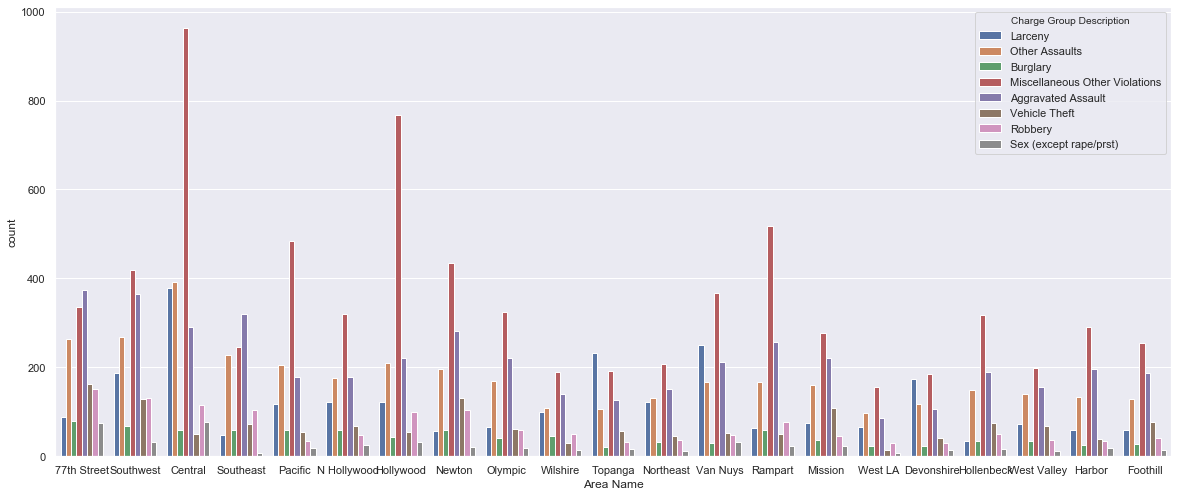

In [120]:
data = arr[arr['Charge Group Description'].isin(top_crimes)]

sns.countplot(x='Area Name', order =  neigh_order, data= data, hue = 'Charge Group Description', hue_order= crime_order);


Since we have data for crime reports about the time when it happened, some characteristics about the victim, and the location, we will implement an algorithm to reduce dimensionality and describe the factors that explain for most of the variance in crime. For this we use a principal component analysis (PCA), and analyse the first eighen vectors to see how the variables interact with each other. 

In [125]:
# First, let's create a dataframe that only contains the variables that will be used in the analysis
cri_pca = cri[cri['crime_description_recoded'].isin(top_crimes)].drop(columns = ['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'crime_description_recoded','date', 'Location ', 'week', 'weekday', 'month'])
# These are the columns that remain
cri_pca.columns

Index(['victim_female', 'victim_hispanic', 'victim_white', 'victim_black',
       'victim_asian', 'larceny', 'car_theft', 'robbery', 'burglary',
       'other_assault', 'aggravated_assault', 'drugs', 'violation', 'sex',
       'rape', 'weapon', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_12', '77th Street', 'Central',
       'Devonshire', 'Foothill', 'Harbor', 'Hollenbeck', 'Hollywood',
       'Mission', 'N Hollywood', 'Newton', 'Northeast', 'Olympic', 'Pacific',
       'Rampart', 'Southeast', 'Southwest', 'Topanga', 'Van Nuys', 'West LA',
       'West Valley', 'Wilshire'],
      dtype='object')

In [126]:
# Second, we fit feature scaling to the general population demographics data.
scaler = StandardScaler()
scaler.fit(cri_pca)
scaled_df = pd.DataFrame(scaler.transform(cri_pca), columns = cri_pca.columns)

In [127]:
# Apply PCA to the data.
pca = PCA(int(scaled_df.shape[1]*.5))
X_pca = pca.fit_transform(scaled_df)

In [183]:
# I'm using the scree_plot function from the helpers_functions.py file from the udacity notebook

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    plt.savefig('scree_plot_pca')

0.6341347172066337

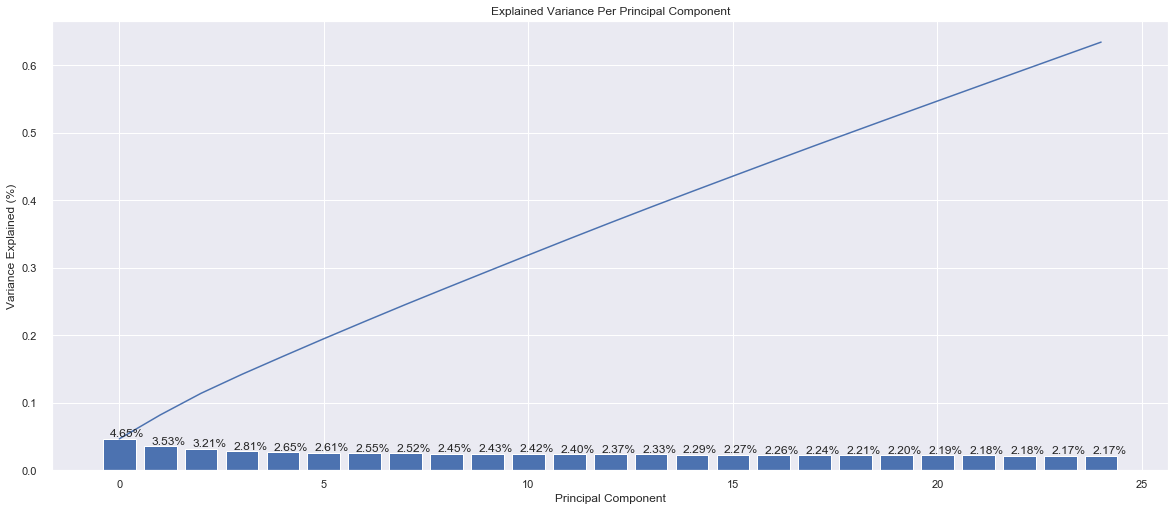

In [185]:
import numpy as np
# Investigate the variance accounted for by each principal component.
scree_plot(pca)
pca.explained_variance_ratio_.sum()

As we can see, the variance is spread out accross the components. Usually, we could expect that the first couple of components would explain a big chunk of the variance, allowing to target on specific factors. At first glance, we can see that criminal activity is widely scattered accross the city, and accross time. 

In [186]:
# Map weights for the  principal components to corresponding feature names
# and then print the linked values, sorted by weight.

# 
#dimensions = dimensions = ['dim_{}'.format(i) for i in range(1,len(pca.components_)+1)]

def see_component(pca,df, comp):
    dimensions = dimensions = [i for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(pca.components_, columns = df.keys())
    components.index = dimensions

    print(components.loc[comp].sort_values().head(10))
    print(components.loc[comp].sort_values().tail(10))

# Let's analyse the first component
see_component(pca, scaled_df, 1)

larceny        -0.471865
car_theft      -0.316612
victim_white   -0.206165
Pacific        -0.097014
West LA        -0.089590
Topanga        -0.069056
burglary       -0.056819
Devonshire     -0.056486
N Hollywood    -0.056329
Northeast      -0.049307
Name: 1, dtype: float64
Southwest             0.065707
sex                   0.068753
Newton                0.071125
Southeast             0.119243
77th Street           0.130098
victim_black          0.226031
victim_female         0.251433
victim_hispanic       0.310105
aggravated_assault    0.325543
other_assault         0.461008
Name: 1, dtype: float64


When we map the first component, we observe that both types of assault are positively correlated. Also positively correlated with assaults are being a black victim, female, and hispanic. Incidentally, the prevalence of assault is negatively correlated to larceny and car theft, and having a victim of white ethnicity.

In [187]:
# Now, the second component
see_component(pca, scaled_df, 2)

car_theft            -0.414859
larceny              -0.352915
victim_hispanic      -0.161620
Southeast            -0.140507
77th Street          -0.138963
Newton               -0.132425
Mission              -0.111197
aggravated_assault   -0.095996
Hollenbeck           -0.084194
victim_black         -0.077854
Name: 2, dtype: float64
Topanga          0.091309
Wilshire         0.103115
N Hollywood      0.103836
Hollywood        0.109143
Pacific          0.116924
violation        0.139634
West LA          0.150544
victim_female    0.187186
burglary         0.407124
victim_white     0.499266
Name: 2, dtype: float64


In the second component, having a victim of white ethhicity, is positively correlated with burglary, having a female victim, and happening on a neighborhood of 'middle' criminal activity. These factor, are negatively correlated with car theft, larceny, having a victim of hispanic descent and happening on a neighborhood with higher criminality. 

In [174]:
see_component(pca, scaled_df, 3)

victim_hispanic   -0.554625
Hollenbeck        -0.214068
violation         -0.199248
Mission           -0.175129
Foothill          -0.131265
Newton            -0.115054
Rampart           -0.099851
robbery           -0.075482
Northeast         -0.072561
Olympic           -0.069205
Name: 3, dtype: float64
Pacific               0.076776
larceny               0.094583
victim_white          0.100538
Central               0.112666
Southeast             0.118806
other_assault         0.133141
Southwest             0.163586
aggravated_assault    0.164816
77th Street           0.226158
victim_black          0.565900
Name: 3, dtype: float64


For the third component, in general, having a victim of black ethnicity is positively correlated with both types of assault, happening in the neighborhoods with higher criminal activity, and negatively correlated with having a victim of hispanic ethnicity, being in a neighborhood with lower crime and miscelalous violations. 

**To answer question 3** it seems that the criminal activity is so scattered, that the most violent crimes are not correlated with the least violent but more prevalent, like larceny. The data seems to suggest that unless there is a differentiated strategy, fighting one type of crime, does not help to curve or prevent the other type.

## Conclusion

Crime in LA seems to have a very heterogeneous pattern, making it difficult to maximize the impact of the police deparment's action. It seems that fighting the most violent types of crimes (assaults) is uncorrelated with the more prevalent crimes, like larceny and burglary. 

It also seems that the department concetrates efforst in those efforts that seem "close to home". Namely, the most frequent type of arrests have to do with court orders (violations of parore, etc), and flagrant acts (like assaults), paying more attention to the Central neighborhood, rather than the one where most of the crime reports happen: 77th street. 

While the data analyzed here only considers arrestss and not any other actions performed by the police, it seems that the department could benefit from a more systematic approach to its own data. Prospectively, this data could shed some light toward strategies focusing on prevention. 